In [6]:
import pandas as pd

# Corrected dataset with 50 data points
data = {
    'tweet': [
        "I love this product!",
        "This is the worst experience ever.",
        "Amazing quality and fast delivery.",
        "I hate it so much.",
        "Totally worth the price!",
        "Not satisfied with the service.",
        "Excellent customer support.",
        "Terrible quality, do not buy.",
        "Very happy with my purchase.",
        "Worst product I have ever bought.",
        "Highly recommend this to everyone.",
        "Disappointed with the performance.",
        "Great value for money.",
        "Will never buy this again.",
        "Superb experience, will buy again.",
        "Awful, just awful.",
        "Loved the packaging and the product.",
        "Horrible customer service.",
        "Very pleased with the quality.",
        "Not worth the money.",
        "Fantastic product, highly recommend.",
        "Regret buying this product.",
        "Top-notch quality and service.",
        "Would not recommend to anyone.",
        "Best purchase I've made in a while.",
        "Extremely poor quality.",
        "Satisfied with the overall experience.",
        "Terrible, do not waste your money.",
        "Amazing product, will buy again.",
        "Worst decision ever to buy this.",
        "Very good quality and fast shipping.",
        "Hate it, absolutely hate it.",
        "Worth every penny!",
        "Not happy with the purchase at all.",
        "Excellent, five stars!",
        "Bad experience, will not buy again.",
        "Very impressed with the quality.",
        "Awful product, very disappointed.",
        "Great product and fast delivery!",
        "Terrible, would not recommend.",
        "Love it, will buy more!",
        "Worst customer service ever.",
        "Very satisfied with my purchase.",
        "Do not like it at all.",
        "Fantastic quality and service!",
        "Horrible experience, do not buy.",
        "Very happy with the product!",
        "Not worth the price.",
        "Amazing service and quality.",
        "Disappointed, expected better."
    ],
    'label': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
              1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
              1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
              1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
              1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)
df

,tweet,label
0,I love this product!,1
1,This is the worst experience ever.,0
2,Amazing quality and fast delivery.,1
3,I hate it so much.,0
4,Totally worth the price!,1
5,Not satisfied with the service.,0
6,Excellent customer support.,1
7,"Terrible quality, do not buy.",0
8,Very happy with my purchase.,1
9,Worst product I have ever bought.,0


In [40]:
#val_df

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [42]:
def  preprocess_texts(texts, max_vocab_size=10000, max_seq_len = 50):
    tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_seq_len, padding='post')
    return tokenizer, padded_sequences

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def preprocess_texts(texts, max_vocab_size=10000, max_seq_len=50):
    # Initialize the tokenizer
    tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
    
    # Fit the tokenizer on the texts
    tokenizer.fit_on_texts(texts)
    print("Word Index:", tokenizer.word_index)
    
    # Convert texts to sequences
    sequences = tokenizer.texts_to_sequences(texts)
    print("Sequences:", sequences)
    
    # Pad the sequences
    padded_sequences = pad_sequences(sequences, maxlen=max_seq_len, padding='post')
    print("Padded Sequences:", padded_sequences)
    
    return tokenizer, padded_sequences

# Example usage
texts = ["This is a sample text.", "We are testing the preprocessing function."]
tokenizer, padded_sequences = preprocess_texts(texts)

Word Index: {'<OOV>': 1, 'this': 2, 'is': 3, 'a': 4, 'sample': 5, 'text': 6, 'we': 7, 'are': 8, 'testing': 9, 'the': 10, 'preprocessing': 11, 'function': 12}
Sequences: [[2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12]]
Padded Sequences: [[ 2  3  4  5  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 7  8  9 10 11 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]]


In [45]:
# Preprocess the tweets
max_vocab_size = 10000
max_seq_len = 50

tokenizer, padded_tweets = preprocess_texts(df['tweet'], max_vocab_size, max_seq_len)
labels = np.array(df['label'])

Word Index: {'<OOV>': 1, 'the': 2, 'not': 3, 'product': 4, 'quality': 5, 'with': 6, 'buy': 7, 'and': 8, 'very': 9, 'this': 10, 'service': 11, 'experience': 12, 'it': 13, 'will': 14, 'worst': 15, 'ever': 16, 'worth': 17, 'do': 18, 'purchase': 19, 'recommend': 20, 'again': 21, 'i': 22, 'amazing': 23, 'fast': 24, 'hate': 25, 'satisfied': 26, 'customer': 27, 'terrible': 28, 'happy': 29, 'to': 30, 'disappointed': 31, 'money': 32, 'awful': 33, 'love': 34, 'delivery': 35, 'price': 36, 'excellent': 37, 'my': 38, 'highly': 39, 'great': 40, 'horrible': 41, 'fantastic': 42, 'would': 43, 'at': 44, 'all': 45, 'is': 46, 'so': 47, 'much': 48, 'totally': 49, 'support': 50, 'have': 51, 'bought': 52, 'everyone': 53, 'performance': 54, 'value': 55, 'for': 56, 'never': 57, 'superb': 58, 'just': 59, 'loved': 60, 'packaging': 61, 'pleased': 62, 'regret': 63, 'buying': 64, 'top': 65, 'notch': 66, 'anyone': 67, 'best': 68, "i've": 69, 'made': 70, 'in': 71, 'a': 72, 'while': 73, 'extremely': 74, 'poor': 75, 'o

In [46]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(padded_tweets, labels, test_size=0.2, random_state=42)

In [47]:
# Build the LSTM model
model = Sequential([
    Embedding(input_dim=max_vocab_size, output_dim=64, input_length=max_seq_len),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 64)            640000    
                                                                 
 lstm_2 (LSTM)               (None, 128)               98816     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 738,945
Trainable params: 738,945
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32
)

Epoch 1/100
2/2 [==============================] - 3s 585ms/step - loss: 0.6936 - accuracy: 0.5250 - val_loss: 0.6985 - val_accuracy: 0.4000
Epoch 2/100
2/2 [==============================] - 0s 86ms/step - loss: 0.6932 - accuracy: 0.5250 - val_loss: 0.6952 - val_accuracy: 0.4000
Epoch 3/100
2/2 [==============================] - 0s 85ms/step - loss: 0.6934 - accuracy: 0.4000 - val_loss: 0.6933 - val_accuracy: 0.4000
Epoch 4/100
2/2 [==============================] - 0s 90ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6944 - val_accuracy: 0.4000
Epoch 5/100
2/2 [==============================] - 0s 91ms/step - loss: 0.6939 - accuracy: 0.4750 - val_loss: 0.6952 - val_accuracy: 0.4000
Epoch 6/100
2/2 [==============================] - 0s 91ms/step - loss: 0.6941 - accuracy: 0.5250 - val_loss: 0.6951 - val_accuracy: 0.4000
Epoch 7/100
2/2 [==============================] - 0s 88ms/step - loss: 0.6930 - accuracy: 0.5750 - val_loss: 0.6942 - val_accuracy: 0.4000
Epoch 8/100
2/2 [==

In [49]:
new_sentence = ["Liked the movie soo much"]

tokenizer, new_padded_sequence = preprocess_texts(new_sentence)
prediction = model.predict(new_padded_sequence)

Word Index: {'<OOV>': 1, 'liked': 2, 'the': 3, 'movie': 4, 'soo': 5, 'much': 6}
Sequences: [[2, 3, 4, 5, 6]]
Padded Sequences: [[2 3 4 5 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
1/1 [==============================] - 0s 457ms/step


In [50]:
prediction

array([[0.00213589]], dtype=float32)

C:\Users\sayantghosh\AppData\Local\Temp\ipykernel_32916\1452750849.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


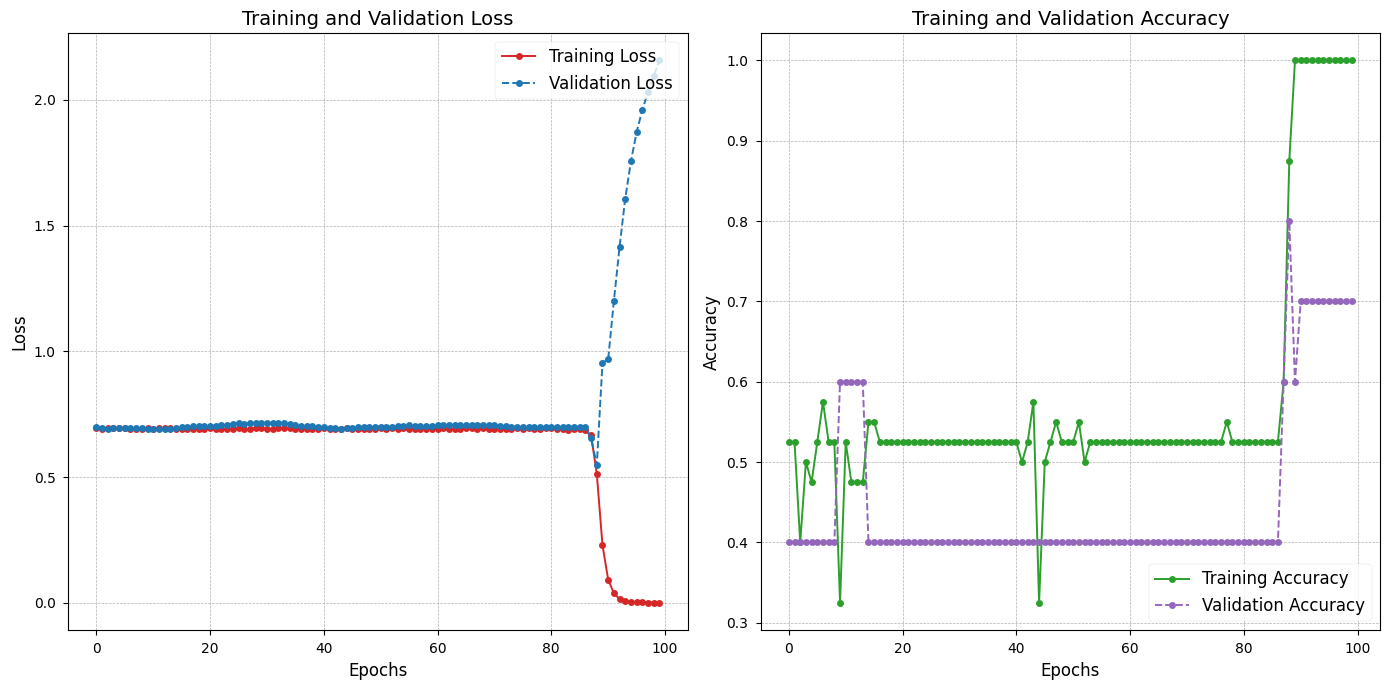

In [51]:
import matplotlib.pyplot as plt

# Set the style for the plot (e.g., 'seaborn-paper' style for professional look)
plt.style.use('seaborn-paper')

# Create the figure with a larger size for better visibility
plt.figure(figsize=(14, 7))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o', markersize=5, linestyle='-', color='tab:red')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o', markersize=5, linestyle='--', color='tab:blue')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o', markersize=5, linestyle='-', color='tab:green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o', markersize=5, linestyle='--', color='tab:purple')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Apply tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
